# Libraries

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib as plt
import matplotlib.pyplot as plt
import pickle

# Dataset Editing

In [ ]:
File = r'/content/drive/MyDrive/Dogs&Cats/Dataset'
Categories = ["Cats", "Dogs"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data = []

for category in Categories:
    subFile = os.path.join(File, category)
    label = Categories.index(category)
    i = 0
    for image in os.listdir(subFile):
        imagePath = os.path.join(subFile, image)
        i = i + 1
        print("Arranging image", + i)
        try:
            imageModified = cv2.imread(imagePath)
            imageModified = cv2.resize(imageModified, (100, 100))
            plt.imshow(imageModified)
            data.append([imageModified, label])
        except Exception as e:
            print(f"Error processing image {imagePath}: {e}")
            os.remove(imagePath)

print("Resized data saved successfully!")

In [ ]:
print(len(data))

600


In [ ]:
random.shuffle(data)

# Formatting for the Neural Network

In [ ]:
X = []
Y = []

for features, labels in data:
  X.append(features)
  Y.append(labels)

X = np.array(X)
Y = np.array(Y)

pickle.dump(X, open("X.pkl", "wb"))
pickle.dump(Y, open("Y.pkl", "wb"))

In [ ]:
X = pickle.load(open("X.pkl", "rb"))
Y = pickle.load(open("Y.pkl", "rb"))

X = X/255

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
neuralNetwork = Sequential()

neuralNetwork.add(Conv2D(32, (3, 3), activation = "relu"))
neuralNetwork.add(MaxPooling2D((2, 2)))

neuralNetwork.add(Conv2D(64, (3, 3), activation = "relu"))
neuralNetwork.add(MaxPooling2D((2, 2)))

neuralNetwork.add(Conv2D(64, (3, 3), activation = "relu"))
neuralNetwork.add(MaxPooling2D((2, 2)))

neuralNetwork.add(Flatten())

neuralNetwork.add(Dense(128, input_shape = X.shape[1:], activation  = "relu"))

neuralNetwork.add(Dense(2, activation = "softmax"))

In [ ]:
neuralNetwork.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = neuralNetwork.fit(X, Y, epochs = 10, validation_split = 0.1)

Epoch 1/10
17/17 [==============================] - 10s 494ms/step - loss: 0.6852 - accuracy: 0.5611 - val_loss: 0.6439 - val_accuracy: 0.6333
Epoch 2/10
17/17 [==============================] - 10s 622ms/step - loss: 0.5738 - accuracy: 0.6944 - val_loss: 0.6006 - val_accuracy: 0.7167
Epoch 3/10
17/17 [==============================] - 9s 516ms/step - loss: 0.4644 - accuracy: 0.7704 - val_loss: 0.6451 - val_accuracy: 0.6667
Epoch 4/10
17/17 [==============================] - 10s 548ms/step - loss: 0.3955 - accuracy: 0.8333 - val_loss: 0.5175 - val_accuracy: 0.8333
Epoch 5/10
17/17 [==============================] - 11s 629ms/step - loss: 0.3697 - accuracy: 0.8463 - val_loss: 0.5108 - val_accuracy: 0.8000
Epoch 6/10
17/17 [==============================] - 8s 475ms/step - loss: 0.3309 - accuracy: 0.8574 - val_loss: 0.5771 - val_accuracy: 0.8333
Epoch 7/10
17/17 [==============================] - 10s 623ms/step - loss: 0.2722 - accuracy: 0.8852 - val_loss: 0.5638 - val_accuracy: 0.8167
E

# Test

In [ ]:
testFile = r'/content/drive/MyDrive/Rede Neural - Dogs & Cats/Teste'
testCategories = ["Gatos", "Cachorros"]

1/1 [==============================] - 0s 92ms/step


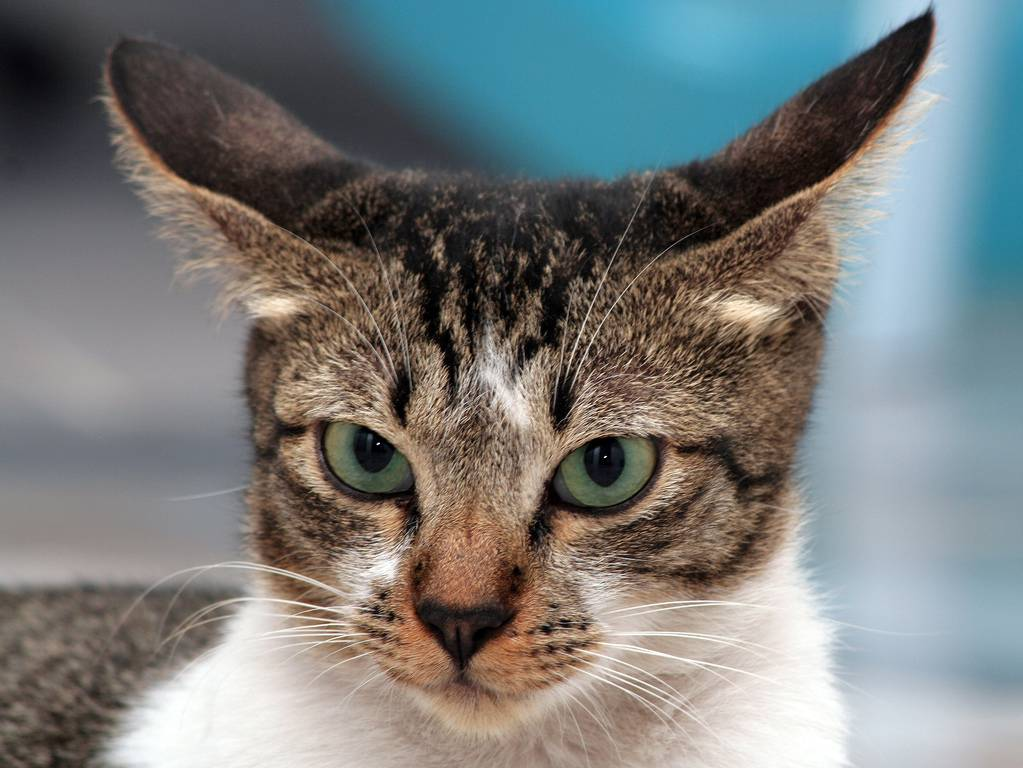

Dog
1/1 [==============================] - 0s 39ms/step


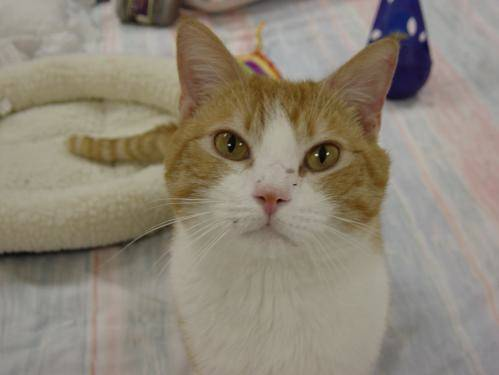

Cat
1/1 [==============================] - 0s 28ms/step


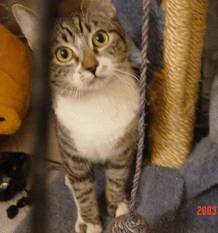

Cat
1/1 [==============================] - 0s 24ms/step


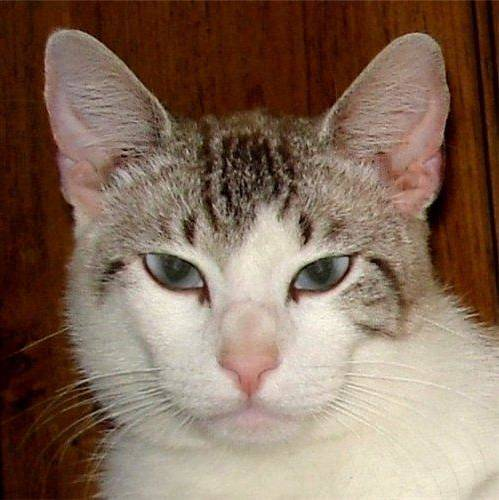

Cat
1/1 [==============================] - 0s 49ms/step


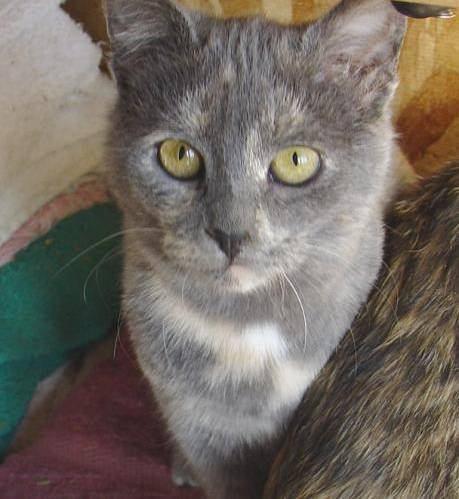

Cat
1/1 [==============================] - 0s 50ms/step


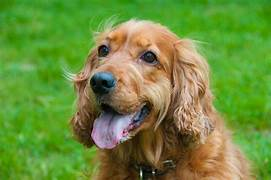

Dog
1/1 [==============================] - 0s 55ms/step


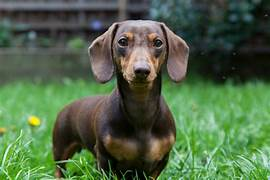

Dog
1/1 [==============================] - 0s 58ms/step


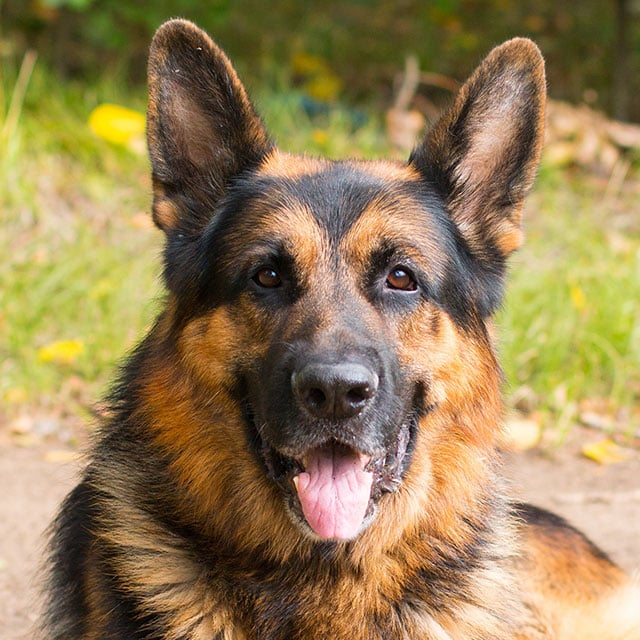

Dog
1/1 [==============================] - 0s 82ms/step


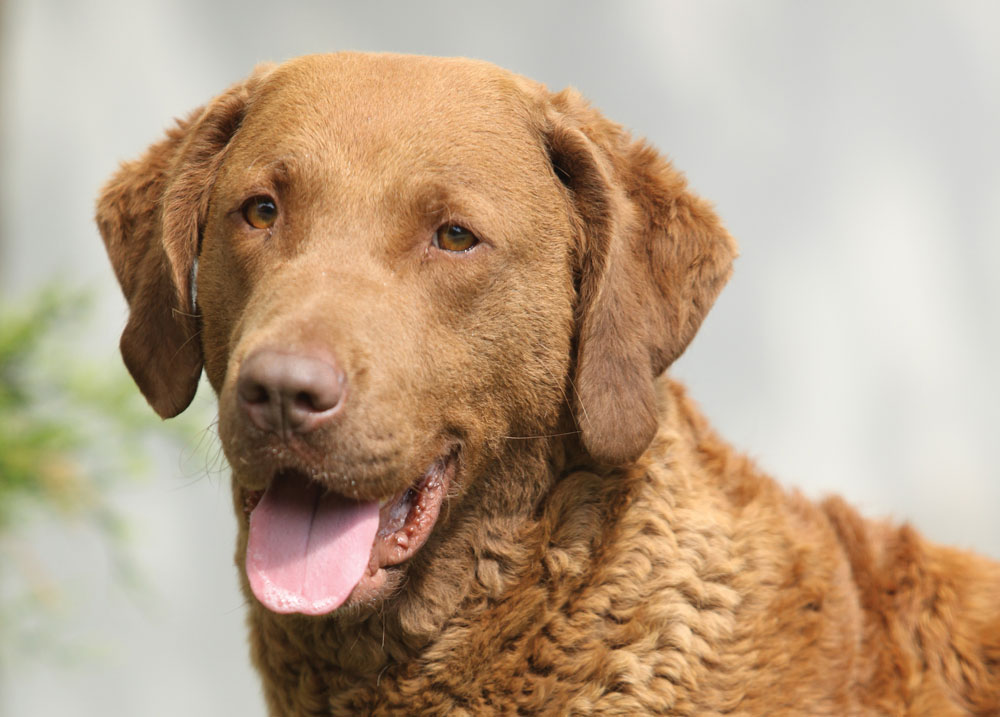

Dog
1/1 [==============================] - 0s 48ms/step


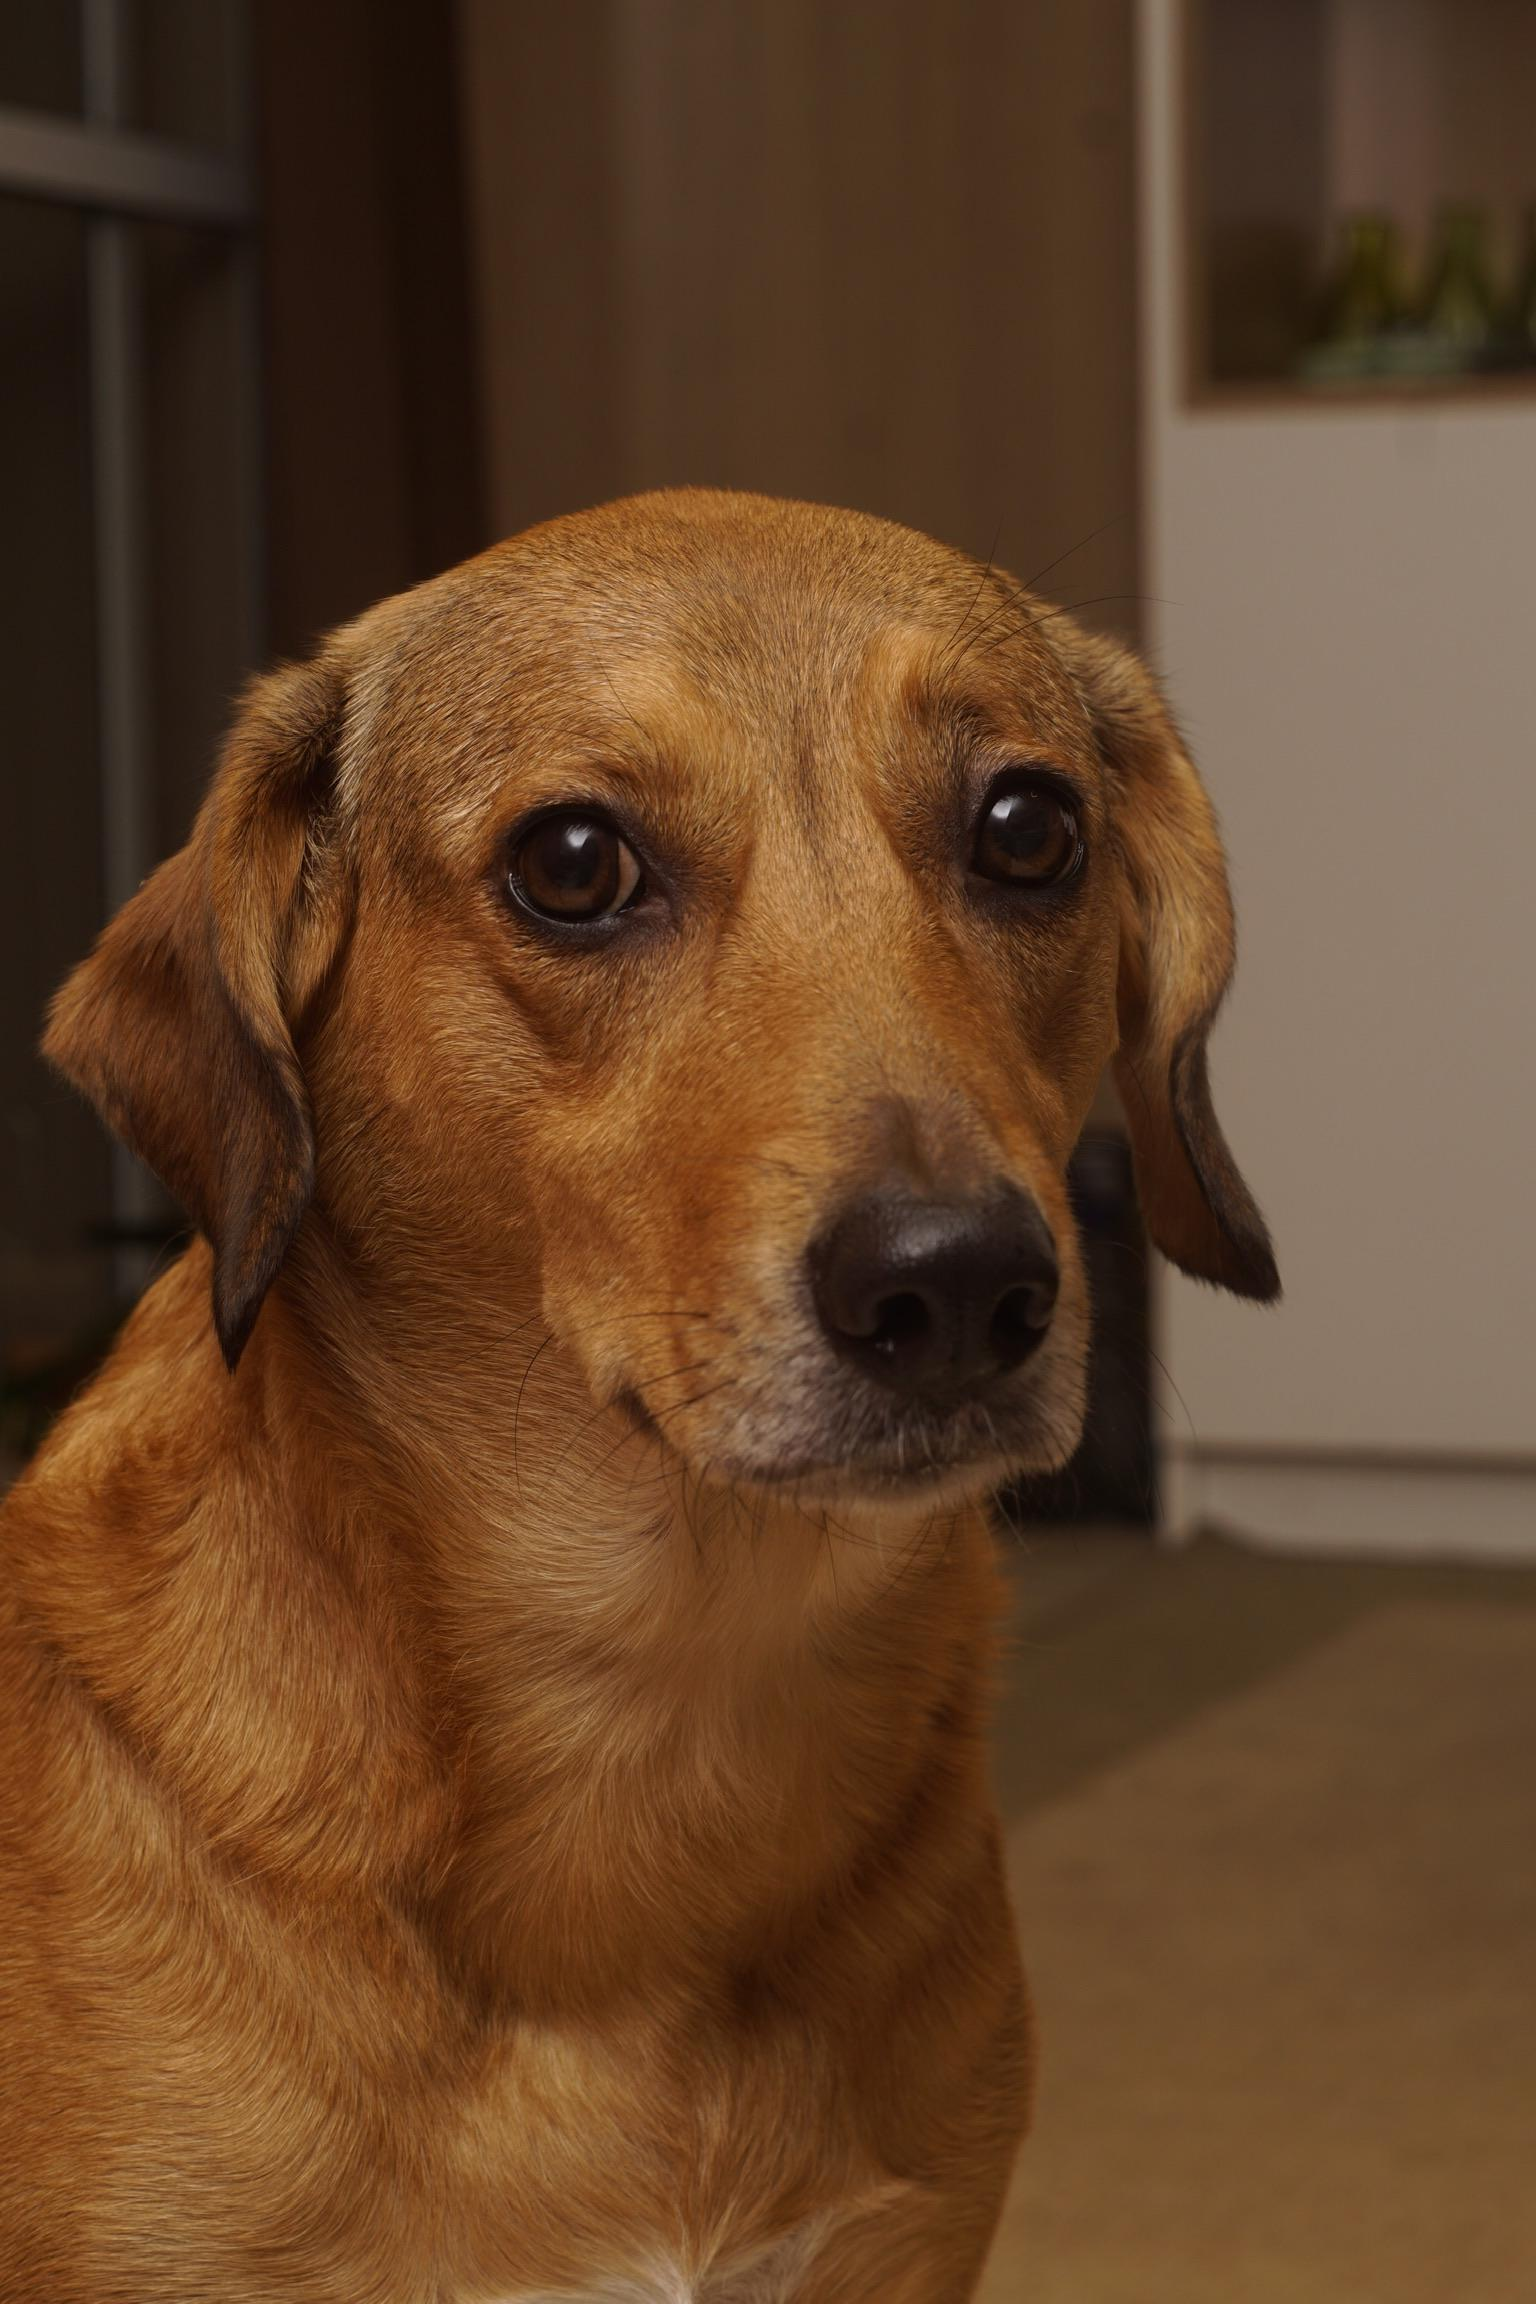

Dog


In [ ]:
import os
from IPython.display import display
from PIL import Image

Data = []

for category in testCategories:
    subTestFile = os.path.join(testFile, category)
    label = testCategories.index(category)
    for image in os.listdir(subTestFile):
            imagePath = os.path.join(subTestFile, image)
            try:
                image = cv2.imread(imagePath)
                image = cv2.resize(image, (100, 100))
                Data.append([image, label])

                X = []
                Y = []

                for features, labels in Data:
                  X.append(features)
                  Y.append(labels)

                X = np.array(X)
                Y = np.array(Y)

                pickle.dump(X, open("X.pkl", "wb"))
                pickle.dump(Y, open("Y.pkl", "wb"))

                X = pickle.load(open("X.pkl", "rb"))
                Y = pickle.load(open("Y.pkl", "rb"))

                X = X/255

                X.shape

                image = np.expand_dims(image, axis=0)


                prevision = neuralNetwork.predict(image)
                predicted_class = np.argmax(prevision)
                printedImage = Image.open(imagePath)
                display(printedImage)

                if predicted_class == 0:
                    print("Cat")
                else:
                    print("Dog")

            except Exception as e:
                print("")

